In [ ]:
import numpy as np
from dataset import generate_synth_dataset
from sklearn.model_selection import train_test_split
from model import LogRegCCD


In [ ]:
p = 0.5   
n = 200  
d = 10    
g = 0.5   

dataset = generate_synth_dataset(p, n, d, g)
print(dataset.head())

         f1        f2        f3        f4        f5        f6        f7  \
0  0.961412  0.714039 -0.893236 -1.544564 -0.226584 -1.928740 -1.634220   
1  0.624945  2.383728  2.223799  0.884000 -0.650315 -0.875557  0.194340   
2  1.935004  1.355292  1.031833 -0.728070 -0.933304  0.093466  0.102319   
3  1.021266 -0.817772  1.240670 -0.942033 -0.765502 -2.176895 -1.729196   
4  0.786856  0.108609 -0.522355 -2.311136  0.033469 -1.830849 -1.744168   

         f8        f9       f10  Y  
0 -2.078740  0.605254  0.459345  0  
1  0.347565 -1.206437  0.116096  0  
2 -0.326045  0.522299 -0.459592  1  
3 -0.813599  0.141855  0.462587  0  
4 -0.988763  0.818588 -0.984591  1  


In [ ]:
feature_cols =['f1','f2','f3','f4','f5','f6','f7','f8', 'f9','f10']
y = dataset.Y
X = dataset[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


0.1


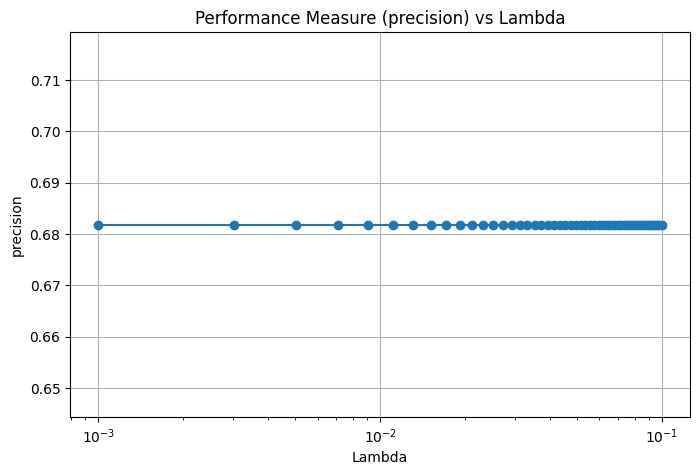

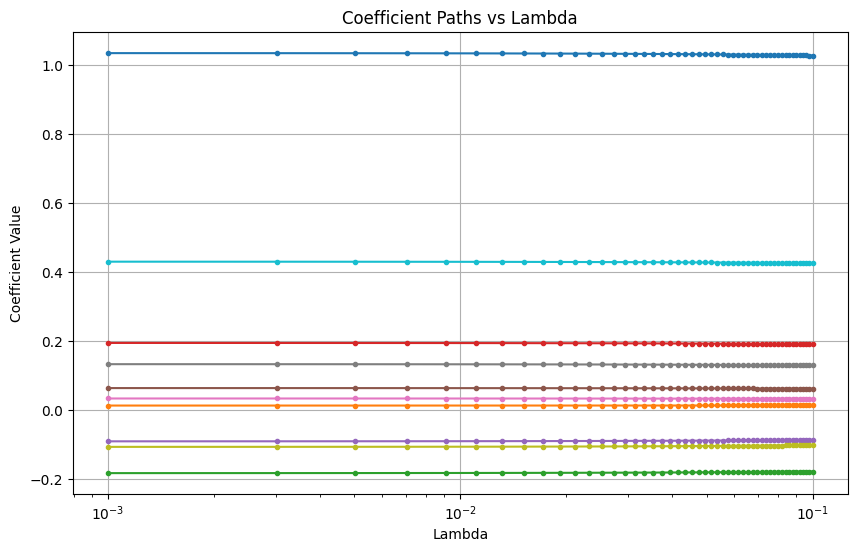

In [ ]:
lambdas = np.linspace(
    0.1, 0.001, 50
)  # explicitly 50 lambda values from 0.1 to 0.001
model = LogRegCCD(lambdas=lambdas)
model.fit(X_train, y_train, alpha=0.3)
model.validate(X_val, y_val)
print(model.best_lambda_)

model.plot(X_val, y_val, measure="precision")
model.plot_coefficients()

0.027265306122448985


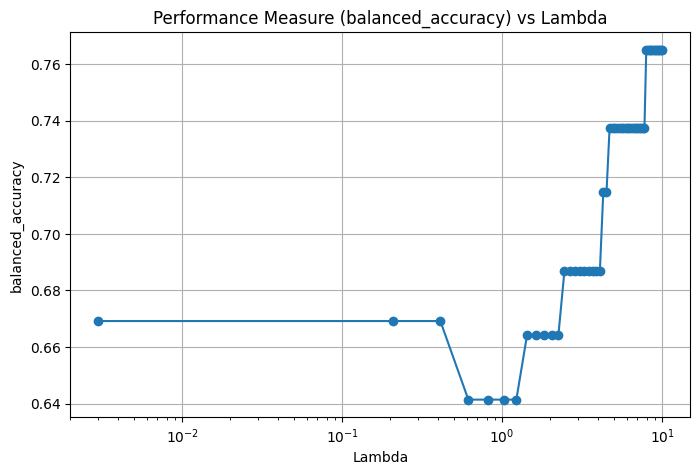

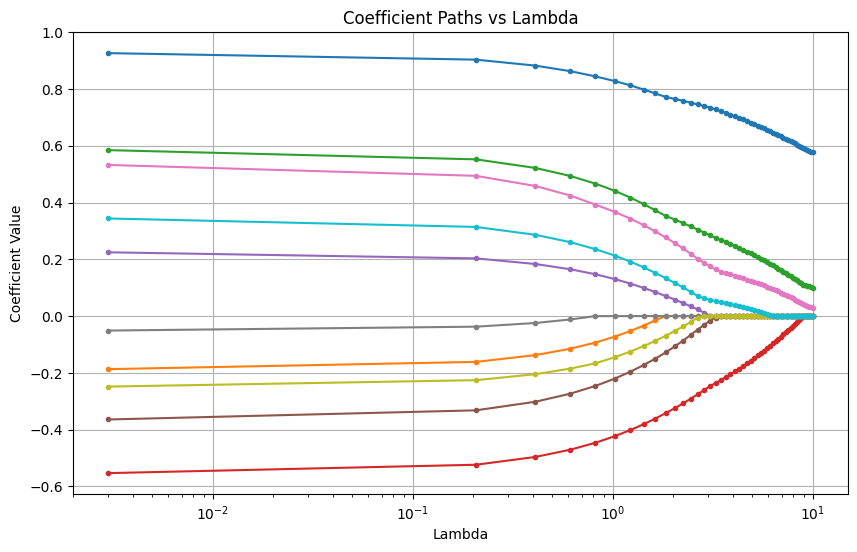

In [40]:
lambdas = np.linspace(10, 0.003, 50)  # explicitly 100 lambda values from 0.001 to 0.000001
model_diff_params = LogRegCCD(lambdas=lambdas)
model_diff_params.fit(X_train, y_train, alpha=0.5)
model_diff_params.validate(X_val, y_val)
print(model.best_lambda_)
model_diff_params.plot(X_val, y_val, measure="balanced_accuracy")
model_diff_params.plot_coefficients()